In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#dataset
data = pd.read_csv('cardio_train.csv',sep=';')

In [3]:
#Features:

#Age | Objective Feature | age | int (days)
#Height | Objective Feature | height | int (cm) |
#Weight | Objective Feature | weight | float (kg) |
#Gender | Objective Feature | gender | categorical code |   1-Women,  2- Men
#Systolic blood pressure | Examination Feature | ap_hi | int |
#Diastolic blood pressure | Examination Feature | ap_lo | int |
#Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
#Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
#Smoking | Subjective Feature | smoke | binary |
#Alcohol intake | Subjective Feature | alco | binary |
#Physical activity | Subjective Feature | active | binary |
#Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

data

In [5]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
data.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [9]:
data.shape

(70000, 13)

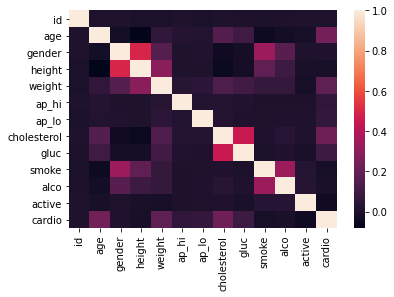

In [10]:
sns.heatmap(data.corr())

In [11]:
#most related factors 
# gender & height - 0.49
# cholesterol & glucose - 0.45
# smoke & gender - 0.33
# height & weight - 0.29
# cardio & age - 0.23
# cardio & cholesterol - 0.22

In [12]:
#aim is to see a person is with or without cardio disease
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

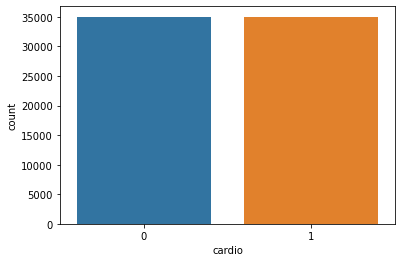

In [13]:
sns.countplot(x='cardio',data = data)
plt.savefig('countplot_of_people_having_disease')

In [14]:
#count it percentage wise

have_cardio = len(data[data['cardio'] == 1])
not_cardio = len(data[data['cardio'] == 0])

perc_cardio = have_cardio / ( have_cardio + not_cardio)
perc_not_cardio = not_cardio / ( have_cardio + not_cardio)

print(' Percentage of people having cardio is ', perc_cardio *100 )
print(' Percentage of people not having cardio is ', perc_not_cardio *100 )

 Percentage of people having cardio is  49.97
 Percentage of people not having cardio is  50.029999999999994


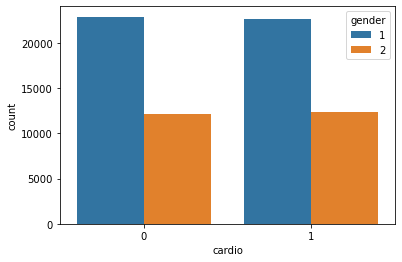

In [15]:
sns.countplot(x='cardio',hue='gender',data = data)

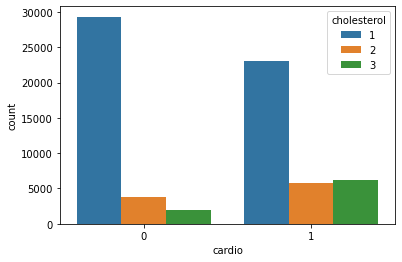

In [16]:
sns.countplot(x='cardio',hue='cholesterol', data=data)

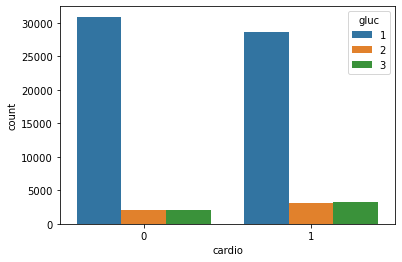

In [17]:
sns.countplot(x='cardio',hue='gluc',data = data)

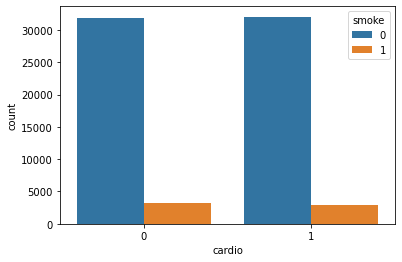

In [18]:
sns.countplot(x='cardio', hue = 'smoke' , data = data)

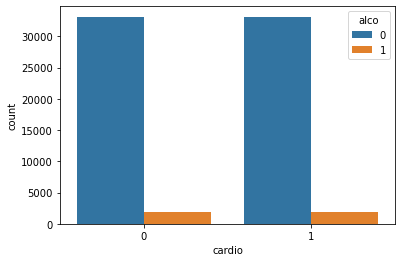

In [19]:
sns.countplot(x='cardio',hue = 'alco', data = data)

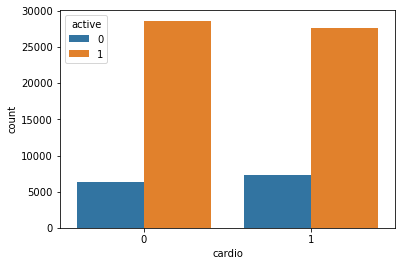

In [20]:
sns.countplot(x='cardio', hue='active', data = data)

In [21]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
data.groupby('cardio').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,,
0,49862.869107,18881.623711,1.345707,164.448017,71.592150,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881
1,50082.102233,20056.813031,1.353441,164.270334,76.822368,137.212042,109.023929,1.517396,1.277595,0.083736,0.052117,0.789559


### Mean age of people not having disease - 18881.6 i.e. 18882 days
### Mean age of people having the disease - 20056.8 i.e. 20057 days

### Mean height of people not having disease - 164.4  i.e 164 cm
### Mean height of people not having disease - 164.2  i.e. 164 cm

### Mean weight of people not having disease - 71.592  i.e.  71kg
### Mean weight of people not having disease - 76.822  i.e.  77kg


In [23]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [24]:
# finding mean by diff class
data.groupby('gender').mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,,
1,49898.345267,19510.124577,161.355612,72.565605,128.139249,94.522776,1.384735,1.235054,0.017856,0.025500,0.802021,0.496727
2,50110.246547,19392.097875,169.947895,77.257307,130.078872,100.551982,1.333633,1.210462,0.218880,0.106375,0.806906,0.505231


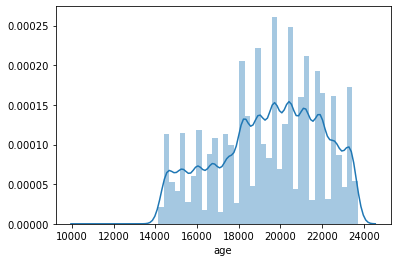

In [25]:
sns.distplot(data['age'])

# most of the age group lies b/w 18000-23000 days

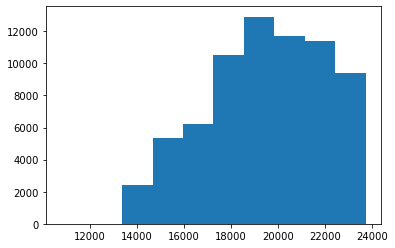

In [26]:
plt.hist(data['age'],bins=10)
plt.show()

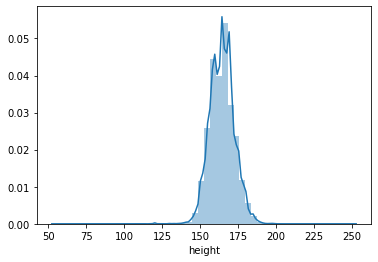

In [27]:
sns.distplot(data['height'])

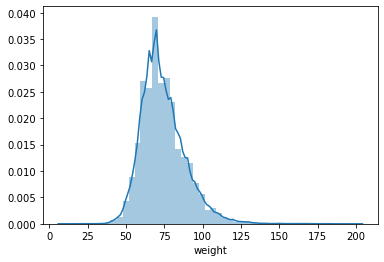

In [28]:
sns.distplot(data['weight'])

In [29]:
#most related factors 
# gender & height - 0.49
# cholesterol & glucose - 0.45
# smoke & gender - 0.33
# height & weight - 0.29
# cardio & age - 0.23
# cardio & cholesterol - 0.22

In [31]:
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
from sklearn.metrics import classification_report

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [44]:
X = data.drop('id',axis=1)

In [45]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [46]:
y = data['cardio']

In [47]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [48]:
#taining and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.65,test_size=0.35,random_state=101)

In [49]:
#model
model = LogisticRegression()

In [50]:
model.fit(X_train,y_train)

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
model.predict(X_test)

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [53]:
predictions = model.predict(X_test)

In [55]:
# checking how many were correct using confusion matrix
confusion_matrix(y_test,predictions)

array([[9154, 3113],
       [4111, 8122]], dtype=int64)

In [56]:
#that is we can see 
# 9154 + 8122 = 17176 were correct
# 4111 + 3113 = 7224 were wrong

In [58]:
# seeing accuracy score 
accuracy_of_model = accuracy_score(y_test,predictions)

In [59]:
accuracy_of_model

0.7051428571428572

### So our model is 70% accurate

In [60]:
predictions

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [61]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [62]:
model.predict([[19066,2,183,105.0,180,90,3,1,0,1,0,1]]) #correct

array([1], dtype=int64)

In [64]:
model.predict([[22431,1,163,72.0,135,80,1,2,0,0,0,1]]) # wrong

array([1], dtype=int64)

In [69]:
#classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72     12267
           1       0.72      0.66      0.69     12233

    accuracy                           0.71     24500
   macro avg       0.71      0.71      0.70     24500
weighted avg       0.71      0.71      0.70     24500



In [65]:
import joblib

In [66]:
joblib.dump(model,'cardioanalysis.pk1')

['cardioanalysis.pk1']